# Imports

In [1]:
# General
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from numpy import array

from sklearn import linear_model
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, confusion_matrix, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Models 
from sklearn.ensemble               import RandomForestRegressor
from sklearn.linear_model           import LinearRegression
from sklearn.tree                   import DecisionTreeRegressor
from sklearn.neighbors              import KNeighborsRegressor

# Load Data

In [2]:
#Load file from EDA 
health_data = pd.read_csv('../data/health_data.csv')

In [3]:
#Check data
health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2908 entries, 0 to 2907
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   State                      2908 non-null   object 
 1   County                     2908 non-null   object 
 2   Life Expectancy            2908 non-null   float64
 3   Population                 2908 non-null   int64  
 4   % Rural                    2908 non-null   int64  
 5   Premature Deaths           2908 non-null   float64
 6   % Smoking                  2908 non-null   int64  
 7   % Obesity                  2908 non-null   int64  
 8   % Physical Inactivy        2908 non-null   int64  
 9   % Excessive Drinking       2908 non-null   int64  
 10  % Uninsured                2908 non-null   float64
 11  PCP Number                 2908 non-null   float64
 12  PCP Rate                   2908 non-null   float64
 13  MHP Number                 2908 non-null   float

In [4]:
#Edit '% Unemployed' to be float type
health_data['% Unemployed']=health_data['% Unemployed'].str.replace(',', '.').astype(float)

In [5]:
health_data.head()

,State,County,Life Expectancy,Population,% Rural,Premature Deaths,% Smoking,% Obesity,% Physical Inactivy,% Excessive Drinking,% Uninsured,PCP Number,PCP Rate,MHP Number,MHP Rate,Preventable Hospital Rate,% Mammogram,% Flu Vaccine,% Unemployed,Median Household Income
0,Alabama,Autauga,77.162581,55869,22921,787.0,20,33,31,14,10.0,26.0,47.0,16.0,29.0,6650.0,39.0,42.0,2.7,58233
1,Alabama,Baldwin,78.213405,223234,77060,3147.0,19,30,25,19,13.0,153.0,70.0,220.0,99.0,3471.0,43.0,46.0,2.7,59871
2,Alabama,Barbour,74.054741,24686,18613,515.0,26,41,28,12,14.0,8.0,32.0,3.0,12.0,5314.0,44.0,39.0,3.8,35972
3,Alabama,Bibb,73.408784,22394,15663,476.0,23,37,33,15,11.0,12.0,54.0,6.0,27.0,6690.0,33.0,40.0,3.1,47918
4,Alabama,Blount,74.370874,57826,51562,1100.0,23,33,33,16,14.0,12.0,21.0,10.0,17.0,4440.0,37.0,40.0,2.7,52902


In [6]:
health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2908 entries, 0 to 2907
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   State                      2908 non-null   object 
 1   County                     2908 non-null   object 
 2   Life Expectancy            2908 non-null   float64
 3   Population                 2908 non-null   int64  
 4   % Rural                    2908 non-null   int64  
 5   Premature Deaths           2908 non-null   float64
 6   % Smoking                  2908 non-null   int64  
 7   % Obesity                  2908 non-null   int64  
 8   % Physical Inactivy        2908 non-null   int64  
 9   % Excessive Drinking       2908 non-null   int64  
 10  % Uninsured                2908 non-null   float64
 11  PCP Number                 2908 non-null   float64
 12  PCP Rate                   2908 non-null   float64
 13  MHP Number                 2908 non-null   float

# Explore The Data

In [7]:
corr=health_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,Life Expectancy,Population,% Rural,Premature Deaths,% Smoking,% Obesity,% Physical Inactivy,% Excessive Drinking,% Uninsured,PCP Number,PCP Rate,MHP Number,MHP Rate,Preventable Hospital Rate,% Mammogram,% Flu Vaccine,% Unemployed,Median Household Income
Life Expectancy,1.000000,0.199262,0.045641,0.157012,-0.711721,-0.489882,-0.608997,0.554417,-0.234980,0.220527,0.272770,0.197070,0.103126,-0.471931,0.354996,0.241978,-0.365966,0.635398
Population,0.199262,1.000000,0.257786,0.971165,-0.299178,-0.216085,-0.218449,0.018560,-0.056610,0.963642,0.198062,0.902026,0.163327,-0.060695,0.012002,0.143791,-0.060329,0.288177
% Rural,0.045641,0.257786,1.000000,0.280563,-0.100710,-0.000631,-0.098400,0.008249,-0.148627,0.212397,0.090689,0.190275,0.111433,-0.017261,0.158330,0.330587,0.007703,0.208763
Premature Deaths,0.157012,0.971165,0.280563,1.000000,-0.265712,-0.191809,-0.185960,0.017531,-0.046900,0.930344,0.205045,0.859178,0.165786,-0.038835,0.018750,0.134986,-0.048874,0.231979
% Smoking,-0.711721,-0.299178,-0.100710,-0.265712,1.000000,0.501682,0.653327,-0.415438,0.138031,-0.323365,-0.381129,-0.292657,-0.211411,0.471754,-0.243328,-0.266728,0.450285,-0.720198
% Obesity,-0.489882,-0.216085,-0.000631,-0.191809,0.501682,1.000000,0.584040,-0.304933,0.047562,-0.255090,-0.291129,-0.245605,-0.235297,0.332100,-0.049488,-0.107595,0.279372,-0.419807
% Physical Inactivy,-0.608997,-0.218449,-0.098400,-0.185960,0.653327,0.584040,1.000000,-0.440898,0.225931,-0.251134,-0.358453,-0.242819,-0.265329,0.433248,-0.222857,-0.207315,0.277297,-0.564055
% Excessive Drinking,0.554417,0.018560,0.008249,0.017531,-0.415438,-0.304933,-0.440898,1.000000,-0.377495,0.042038,0.191899,0.049705,0.045288,-0.352687,0.457671,0.134787,-0.293662,0.411460
% Uninsured,-0.234980,-0.056610,-0.148627,-0.046900,0.138031,0.047562,0.225931,-0.377495,1.000000,-0.091303,-0.216217,-0.107518,-0.191520,0.144780,-0.450615,-0.284607,-0.010972,-0.346744
PCP Number,0.220527,0.963642,0.212397,0.930344,-0.323365,-0.255090,-0.251134,0.042038,-0.091303,1.000000,0.287285,0.934588,0.215955,-0.077264,0.035510,0.160654,-0.082154,0.327138


Based off of the correlation heatmap, the following insights can be seen:
- Life expectancy most highly correlated with median household income (0.635) and % excessive drinking (0.554)
- Life expectancy is negatively related with % Smoking (-0.7)

Other interesting highest correlations were found to be between
- % physical inactivity and % smoking (0.653)
- PCP number and population (0.964)
- MHP number and population (0.902)
- PCP number and premature deaths(0.93)
- MHP number and premature deaths(0.859)
- Population and premature deaths (0.97)
- PCP number and MHP number (0.93)

In [8]:
data = health_data.drop(["State", "County"], axis=1)

In [9]:
data.head()

,Life Expectancy,Population,% Rural,Premature Deaths,% Smoking,% Obesity,% Physical Inactivy,% Excessive Drinking,% Uninsured,PCP Number,PCP Rate,MHP Number,MHP Rate,Preventable Hospital Rate,% Mammogram,% Flu Vaccine,% Unemployed,Median Household Income
0,77.162581,55869,22921,787.0,20,33,31,14,10.0,26.0,47.0,16.0,29.0,6650.0,39.0,42.0,2.7,58233
1,78.213405,223234,77060,3147.0,19,30,25,19,13.0,153.0,70.0,220.0,99.0,3471.0,43.0,46.0,2.7,59871
2,74.054741,24686,18613,515.0,26,41,28,12,14.0,8.0,32.0,3.0,12.0,5314.0,44.0,39.0,3.8,35972
3,73.408784,22394,15663,476.0,23,37,33,15,11.0,12.0,54.0,6.0,27.0,6690.0,33.0,40.0,3.1,47918
4,74.370874,57826,51562,1100.0,23,33,33,16,14.0,12.0,21.0,10.0,17.0,4440.0,37.0,40.0,2.7,52902


In [10]:
data.columns

Index(['Life Expectancy', 'Population', '% Rural', 'Premature Deaths',
       '% Smoking', '% Obesity', '% Physical Inactivy', '% Excessive Drinking',
       '% Uninsured', 'PCP Number', 'PCP Rate', 'MHP Number', 'MHP Rate',
       'Preventable Hospital Rate', '% Mammogram', '% Flu Vaccine',
       '% Unemployed', 'Median Household Income'],
      dtype='object')

In [11]:
health_data.head()

,State,County,Life Expectancy,Population,% Rural,Premature Deaths,% Smoking,% Obesity,% Physical Inactivy,% Excessive Drinking,% Uninsured,PCP Number,PCP Rate,MHP Number,MHP Rate,Preventable Hospital Rate,% Mammogram,% Flu Vaccine,% Unemployed,Median Household Income
0,Alabama,Autauga,77.162581,55869,22921,787.0,20,33,31,14,10.0,26.0,47.0,16.0,29.0,6650.0,39.0,42.0,2.7,58233
1,Alabama,Baldwin,78.213405,223234,77060,3147.0,19,30,25,19,13.0,153.0,70.0,220.0,99.0,3471.0,43.0,46.0,2.7,59871
2,Alabama,Barbour,74.054741,24686,18613,515.0,26,41,28,12,14.0,8.0,32.0,3.0,12.0,5314.0,44.0,39.0,3.8,35972
3,Alabama,Bibb,73.408784,22394,15663,476.0,23,37,33,15,11.0,12.0,54.0,6.0,27.0,6690.0,33.0,40.0,3.1,47918
4,Alabama,Blount,74.370874,57826,51562,1100.0,23,33,33,16,14.0,12.0,21.0,10.0,17.0,4440.0,37.0,40.0,2.7,52902


# RFE feature selection

In [12]:
#X = data['Life Expectancy']
#y = data.drop(columns=['Life Expectancy'],axis=1)

#X=X.values.reshape(-1,1)

#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=123)

In [13]:
#Check data shape
#X.shape, y.shape

In [14]:
#X_train.shape, X_test.shape

In [15]:
#y_train.shape, y_test.shape

In [16]:
y = data['Life Expectancy']
X = data.drop(columns=['Life Expectancy'],axis=1)

print("Feature data dimension: ", X.shape)

Feature data dimension:  (2908, 17)


In [17]:
estimator = RandomForestRegressor(random_state=1, n_estimators=100)
selector = RFE(estimator, n_features_to_select=10, step=1)
selector = selector.fit(X, y)

In [18]:
selector.support_

array([ True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False,  True,  True, False, False,  True])

In [19]:
selector.n_features_

10

In [20]:
selector.ranking_

array([1, 1, 1, 1, 1, 1, 1, 4, 7, 2, 8, 5, 1, 1, 6, 3, 1])

In [21]:
f = selector.get_support(1)
top=data[data.columns[f]]
top

,Life Expectancy,Population,% Rural,Premature Deaths,% Smoking,% Obesity,% Physical Inactivy,MHP Rate,Preventable Hospital Rate,% Unemployed
0,77.162581,55869,22921,787.0,20,33,31,29.0,6650.0,2.7
1,78.213405,223234,77060,3147.0,19,30,25,99.0,3471.0,2.7
2,74.054741,24686,18613,515.0,26,41,28,12.0,5314.0,3.8
3,73.408784,22394,15663,476.0,23,37,33,27.0,6690.0,3.1
4,74.370874,57826,51562,1100.0,23,33,33,17.0,4440.0,2.7
...,...,...,...,...,...,...,...,...,...,...
2903,77.533795,42343,4782,527.0,19,30,24,250.0,2543.0,3.9
2904,87.471434,23464,9887,109.0,13,11,11,494.0,3181.0,2.7
2905,78.244365,20226,9101,271.0,21,35,25,356.0,2839.0,3.9
2906,79.825612,7805,3068,104.0,19,29,29,397.0,3957.0,3.9


# Random Forest Regressor

In [55]:
y = top['Life Expectancy']
X = top.drop(columns=['Life Expectancy'],axis=1)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=123)

In [56]:
rfr = RandomForestRegressor()
model = rfr.fit(X_train, y_train)
y_pred = model.predict(X_test)

Train Score: 0.9455077692349413
Test Score: 0.5760653283615851


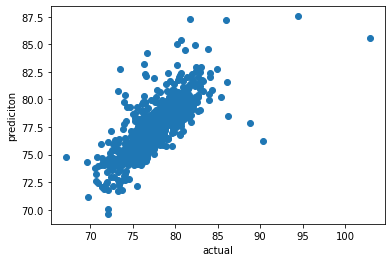

In [57]:
#Evaluate the model.
rfr_score = rfr.score(X_train, y_train)
rfr_score_test = rfr.score(X_test, y_test)

print('Train Score:',rfr_score)
print('Test Score:', rfr_score_test)


plt.scatter(y_test,y_pred)
plt.xlabel('actual')
plt.ylabel('prediciton') 
plt.show()

In [58]:
print("R2 Score: ", r2_score(y_test, rfr.predict(X_test)))
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2 Score:  0.5760653283615851
Mean Absolute Error:  1.372073205454582
Mean Squared Error:  4.1376376516081015
Root Mean Squared Error:  2.0341183966544576


In [60]:
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_train,rfr.predict(X_train))))

Root Mean Squared Error:  0.6854464041962111


# Linear Regression

In [61]:
top.columns

Index(['Life Expectancy', 'Population', '% Rural', 'Premature Deaths',
       '% Smoking', '% Obesity', '% Physical Inactivy', 'MHP Rate',
       'Preventable Hospital Rate', '% Unemployed'],
      dtype='object')

In [62]:
top.head()

,Life Expectancy,Population,% Rural,Premature Deaths,% Smoking,% Obesity,% Physical Inactivy,MHP Rate,Preventable Hospital Rate,% Unemployed
0,77.162581,55869,22921,787.0,20,33,31,29.0,6650.0,2.7
1,78.213405,223234,77060,3147.0,19,30,25,99.0,3471.0,2.7
2,74.054741,24686,18613,515.0,26,41,28,12.0,5314.0,3.8
3,73.408784,22394,15663,476.0,23,37,33,27.0,6690.0,3.1
4,74.370874,57826,51562,1100.0,23,33,33,17.0,4440.0,2.7


In [63]:
y = top['Life Expectancy']
X = top.drop(columns=['Life Expectancy'],axis=1)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=123)

In [64]:
sscaler = StandardScaler()

X_train_scaled= sscaler.fit_transform(X_train)
X_test_scaled= sscaler.transform(X_test)

In [65]:
lr=LinearRegression()
lr_fit=lr.fit(X_train_scaled,y_train)
y_pred = lr_fit.predict(X_test_scaled)

Text(0, 0.5, 'Predictions')

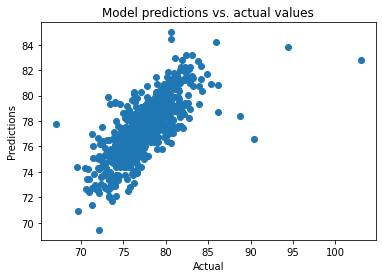

In [66]:
plt.scatter(y_test,y_pred)

plt.title("Model predictions vs. actual values")
plt.xlabel("Actual")
plt.ylabel("Predictions")

In [70]:
#Evaluate the model.
lr_score = lr.score(X_train_scaled, y_train)
lr_score_test = lr.score(X_test_scaled, y_test)

print('Train Score:',lr_score)
print('Test Score:', lr_score_test)

Train Score: 0.5808775706468277
Test Score: 0.5626152549436473


In [71]:
print("R2 Score: ", r2_score(y_test, lr.predict(X_test_scaled)))
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2 Score:  0.5626152549436473
Mean Absolute Error:  1.3999663878264559
Mean Squared Error:  4.2689114867390465
Root Mean Squared Error:  2.066134430945636


# KNN

In [72]:
y = top['Life Expectancy']
X = top.drop(columns=['Life Expectancy'],axis=1)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=123)

In [73]:
sscaler = StandardScaler()

X_train_scaled= sscaler.fit_transform(X_train)
X_test_scaled= sscaler.transform(X_test)

In [78]:
test_scores = []
train_scores = []

for i in range(1,10):

    knn = KNeighborsRegressor(i)
    knn.fit(X_train_scaled,y_train)
    
    train_scores.append(knn.score(X_train_scaled,y_train))
    test_scores.append(knn.score(X_test_scaled,y_test))

In [79]:
print('Train Scores', train_scores)
print('Test Scores', test_scores)

Train Scores [1.0, 0.7943389843676245, 0.7254535461564966, 0.697350522890517, 0.6763977334734084, 0.6641184597675207, 0.6517359810680547, 0.6416325902912952, 0.634048911917177]
Test Scores [0.2971162119804961, 0.42723035302408363, 0.503838176137728, 0.5137949789968731, 0.5498807529631574, 0.5539128012708936, 0.5604489627476761, 0.5636087832645007, 0.565448727226783]


In [80]:
print('Training Data Neighbors:', train_scores.index(max(train_scores))+1)
print('Testing Data Neighbors:', test_scores.index(max(test_scores))+1)

Training Data Neighbors: 1
Testing Data Neighbors: 9


In [81]:
knnr=KNeighborsRegressor(n_neighbors = 9)
knnr.fit(X_train_scaled,y_train)
pred = knnr.predict (X_test_scaled)

In [82]:
print('Training Data Score: ', knnr.score(X_train_scaled, y_train))
print('Test Data Score: ', knnr.score(X_test_scaled,y_test))

Training Data Score:  0.634048911917177
Test Data Score:  0.565448727226783


Train Score: 0.634048911917177
Test Score: 0.565448727226783


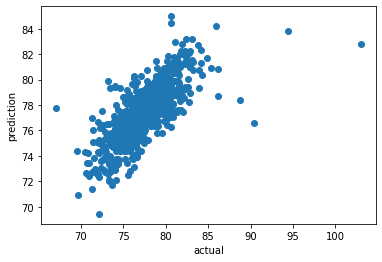

In [83]:
#Evaluate the model.
knnr_score = knnr.score(X_train_scaled, y_train)
knnr_score_test = knnr.score(X_test_scaled, y_test)

print('Train Score:',knnr_score)
print('Test Score:', knnr_score_test)


plt.scatter(y_test,y_pred)
plt.xlabel('actual')
plt.ylabel('prediction')
plt.show()

In [42]:
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score: ", r2_score(y, knnr.predict(X)))

Mean Absolute Error:  1.3999663878264559
Mean Squared Error:  4.2689114867390465
Root Mean Squared Error:  2.066134430945636
R2 Score:  0.30538431758124673
